## <span style="color:blue"> Домашка по кастомизации Plotly </span>

### испольнитель: Шероз Гуломалиев

Задание №1
1. Создайте датафрейм содержащий сумму и количество продаж треков в разбивке по странам и континентам.
2. Создайте scatter plot показывающий соотношение суммы продаж и количества треков.
3. Добавьте разделение по цвету на основе континента. Цвет Азии должен быть жёлтым, цвет Европы синим, цвет Северной Америки красным.
4. Добавьте название диаграмме. Шрифт должен быть 30, цвет шрифта серый.
5. Измените шрифт тиков (значения осей) на 14, цвет на серый.

In [1]:
import plotly.express as px
import pandas as pd
import sqlalchemy as db

In [14]:
username = "sheroz2025"
password = "8888"
host = "127.0.0.1"
port = "5432"
database = "postgres"

In [16]:
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
engine = db.create_engine(connection_string)

In [41]:
query = """
select 
    i.billing_country as country, 
    case 
        when i.billing_country in ('USA', 'Canada', 'Mexico') then 'North America'
        when i.billing_country in ('Brazil', 'Argentina', 'Chile') then 'South America'
        when i.billing_country in ('India', 'China', 'Japan', 'Australia') then 'Asia'
        else 'Europe'
    end as continent,
    count(il.track_id) as track_count, 
    sum(i.total) as total_sales
from invoice i
    left join invoice_line il 
        on i.invoice_id = il.invoice_id
group by i.billing_country;
"""
df = pd.read_sql(query, engine)



In [43]:
df

,country,continent,track_count,total_sales
0,Argentina,South America,38,334.62
1,Spain,Europe,38,334.62
2,Italy,Europe,38,334.62
3,Hungary,Europe,38,446.62
4,India,Asia,74,667.28
5,Czech Republic,Europe,76,879.24
6,Belgium,Europe,38,334.62
7,Sweden,Europe,38,340.62
8,Chile,South America,38,415.62
9,Norway,Europe,38,362.62


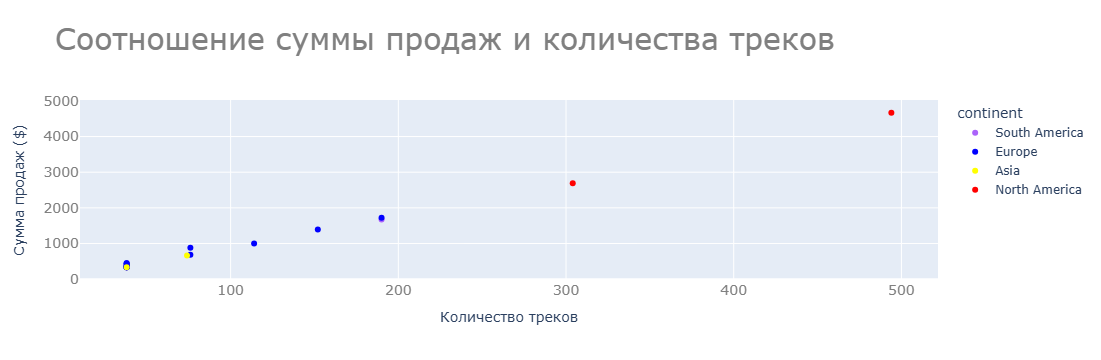

In [45]:
continent_colors = {
    "Asia": "yellow",
    "Europe": "blue",
    "North America": "red"
}

fig = px.scatter(df, 
                 x="track_count", 
                 y="total_sales",
                 color="continent",
                 color_discrete_map=continent_colors,
                 title="Соотношение суммы продаж и количества треков",
                 labels={"track_count": "Количество треков", "total_sales": "Сумма продаж ($)"})

fig.update_layout(
    title=dict(text="Соотношение суммы продаж и количества треков", font=dict(size=30, color="gray")),
    xaxis=dict(tickfont=dict(size=14, color="gray")),
    yaxis=dict(tickfont=dict(size=14, color="gray"))
)

fig.show()


Задание №2
1. Создайте датафрейм содержащий количество треков в разбивке по названиям жанров.
2. Создайте столбчатую диаграмму. По оси X должны быть названия жанров, по оси Y - количество треков.
3. Кастомизируйте диаграмму так, чтобы столбики всех жанров были серого цвета. За исключением жанров Jazz, Rock и Alternative & Punk. Эти жанры должны выделяться цветом. Цвета можете выбирать сами.
4. Уберите легенду.
5. Добавьте название диаграмме. Название должно быть курсивным.
6. Фон диаграммы должен быть белым.

In [54]:
query = """
select
    g.name as genre
    , count(t.track_id) as track_count
from track t
    left join genre g 
        on t.genre_id = g.genre_id
group by g.name
order by track_count DESC;
"""
df = pd.read_sql(query, engine)


In [50]:
df

,genre,track_count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


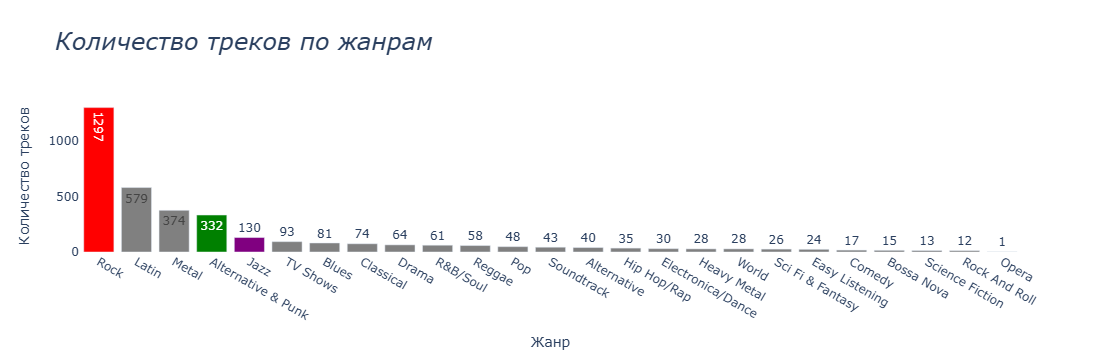

In [56]:
bar_colors = ["gray" if genre not in ["Jazz", "Rock", "Alternative & Punk"] else
              "purple" if genre == "Jazz" else
              "red" if genre == "Rock" else
              "green" for genre in df["genre"]]


fig = px.bar(df, 
             x="genre",
             y="track_count",
             title="Количество треков по жанрам",
             labels={"genre": "Жанр", "track_count": "Количество треков"},
             text_auto=True)


fig.update_traces(marker_color=bar_colors)


fig.update_layout(showlegend=False)


fig.update_layout(title=dict(text="<i>Количество треков по жанрам</i>", font=dict(size=24)))

fig.update_layout(plot_bgcolor="white")

fig.show()
